# <p style="text-align: center;"> <b> Data Exploration and Visualization </b></p>

---

<div class="list-group" id="list-tab" role="tablist">
    
## MỤC LỤC:
- [1. IMPORT THƯ VIỆN](#1)

- [2. TỔNG QUÁT VỀ DỮ LIỆU](#2)
    - [2.1. CÁC CỘT VÀ CÁC DÒNG](#2.1)
        - [Số dòng và số cột của bộ dữ liệu](#2.1.1)
        - [Ý nghĩa của các hàng và các cột](#2.1.2)
    - [2.2. SỐ LƯỢNG DÒNG TRÙNG NHAU](#2.2)
    - [2.3. KIỂU DỮ LIỆU CỦA CÁC THUỘC TÍNH](#2.3)
        - [Kiểm tra kiểu dữ liệu hiện tại của các thuộc tính](#2.3.1)
        - [Thay đổi kiểu dữ liệu các thuộc tính](#2.3.2)

- [3. DATA DISTRIBUTION](#3)
    - [3.1. NHÓM THUỘC TÍNH NUMERICAL](#3.1)
        - [Tính toán thống kê](#3.1.1)
        - [Xem xét các thuộc tính](#3.1.2)
    - [3.2. NHÓM THUỘC TÍNH DATETIME](#3.2)
    - [3.3. NHÓM THUỘC TÍNH CATEGORY](#3.3)
        - [Thuộc tính đơn giá trị: `Name`, `Type`, `Studios`, `Source`, `Rating`](#3.3.1)
        - [thuộc tính nhiều giá trị: `Genres`, `Producers`](#3.3.2)

- [4. TRỰC QUAN HÓA TRẢ LỜI CÂU HỎI](#4)
    - [4.1. Câu hỏi 1:](#4.1)
    - [4.2. Câu hỏi 2:](#4.2)

---

<a class="anchor" id="1"></a>

## 1. IMPORT THƯ VIỆN:

Đây là những thư viện dùng cho Data Exploration và Data Visualization:
- `numpy`: Dùng cho các phép toán trên ma trận
- `pandas`: Dùng để lưu trữ dữ liệu từ các tệp `.csv` và vận hành các hàm trên DataFrame
- `matplotlib`: Dùng để trực quan hóa dữ liệu
- `seaborn`: Dùng để trực quan hóa dữ liệu
- `ast`: Dùng cho literal_eval để đánh giá an toàn các chuỗi chứa biểu thức Python
- `re`: Dùng cho các biểu thức chính quy để trích xuất, phân tích cú pháp, làm sạch chuỗi
- `parse` từ `dateutil.parser`: Dùng để phân tích cú pháp chuỗi ngày
- `datetime` từ `datetime`: Cung cấp các lớp để làm việc với ngày và giờ

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime as dt
import ast
import re

# Disable copy warning
pd.options.mode.chained_assignment = None 

# Disable future warnings and user warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


<a class = "anchor" id = "2"></a>

## 2. TỔNG QUÁT VỀ DỮ LIỆU:

Nhóm sẽ duyệt qua dữ liệu sau khi thực hiện thao tác Data Preprocessing

In [2]:
anime_df = pd.read_csv('./Data Preprocessing/anime-data-preprocessing.csv')
pd.set_option('display.max_columns', None)
anime_df.head()

,Name,Score,Genres,Synopsis,Type,Episodes,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
0,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24.0,R - 17+ (violence & profanity),1,3,217606,2020030,3176556,2009-04-05,2010-07-04
1,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,24.0,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,Visual novel,24.0,PG-13 - Teens 13 or older,2,13,182964,1336233,2440369,2011-04-06,2011-09-14
2,Bleach: Sennen Kessen-hen,9.07,"Action, Adventure, Fantasy",Substitute Soul Reaper Ichigo Kurosaki spends ...,TV,13.0,"TV Tokyo, Aniplex, Dentsu, Shueisha",Pierrot,Manga,24.0,R - 17+ (violence & profanity),3,464,17999,213872,445198,2022-10-11,2022-12-27
3,Gintama°,9.06,"Action, Comedy, Sci-Fi","Gintoki, Shinpachi, and Kagura return as the f...",TV,51.0,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,24.0,PG-13 - Teens 13 or older,4,331,15947,237957,595767,2015-04-08,2016-03-30
4,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama",Seeking to restore humanity's diminishing hope...,TV,10.0,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,23.0,R - 17+ (violence & profanity),5,24,55245,1471825,2104016,2019-04-29,2019-07-01


<a class="anchor" id="2.1"></a>

### 2.1. CÁC CỘT VÀ CÁC DÒNG

<a class="anchor" id="2.1.1"></a>

#### 2.1.1 Số dòng và số cột của bộ dữ liệu 

In [3]:
n_rows , n_cols = anime_df.shape
print(f'Có {n_rows} dòng và {n_cols} cột trong bộ dữ liệu')

Có 13834 dòng và 18 cột trong bộ dữ liệu


<a class="anchor" id="2.1.2"></a>

#### 2.1.2 Ý nghĩa của các hàng và các cột

- Mỗi dòng dữ liệu trong bộ dữ liệu này là dữ liệu về một bộ anime được thu thập trên MyAnimeList vào năm 2023
- Mỗi cột dữ liệu trong bộ dữ liệu này lần lượt có ý nghĩa như sau:

| **CỘT**               |**Ý NGHĨA**               |
|:----------------------|:-------------------------------------------------------------|
|**`Name`**             | Tên của bộ anime                                       |
|**`Score`**            | Điểm trên trang MyAnimeList(MAL)                       |
|**`Genres`**           | Các thể loại của bộ anime                              |
|**`Synopsis`**         | Mô tả hoặc tóm tắt ngắn gọn nội dung của bộ anime      |
|**`Type`**             | Dạng phim của bộ Anime (TV series, Movie, OVA, ...)    |
|**`Episodes`**         | Số lượng tập phim của bộ Anime                         |
|**`Producers`**        | Các công ty sản xuất hoặc nhà sản xuất cho bộ Anime    |
|**`Studios`**          | Các hãng phim Anime đã thực hiện bộ Anime              |
|**`Source`**           | Nguyên tác của bộ Anime (Manga, Light Novel, Original, ...) |
|**`Time per ep (Min)`**| Thời lượng một tập phim của bộ Anime                   |
|**`Rating`**           | Giới hạn độ tuổi xem bộ Anime                          |
|**`Rank`**             | Xếp hạng của bộ Anime                            |
|**`Popularity`**       | Độ phổ biến của bộ Anime                                   |
|**`Favorites`**        | Số lượng người yêu thích bộ Anime               |
|**`Scored By`**        | Số lượng người cho điểm bộ Anime              |
|**`Members`**          | Số lượng thành viên trong hội nhóm của bộ Anime     |
|**`Released date`**    | Ngày phát hành bộ Anime   |
|**`Completed date`**   | Ngày kết thúc bộ Anime   |

<a class="anchor" id="2.2"></a>

### 2.2. SỐ LƯỢNG DÒNG TRÙNG NHAU

Nhóm sẽ kiểm tra trong tập dữ liệu có dòng trùng nhau hay không. Nếu có, thì sẽ tiến hành xóa những dòng trùng đi.

In [4]:
duplicated_rows = anime_df.duplicated().sum()

if duplicated_rows == 0:
    print('Có 0 dòng trùng nhau trong bộ dữ liệu.')
else:
    print(f'Có {duplicated_rows} trùng nhau trong bộ dữ liệu.')
    anime_df = anime_df.drop_duplicates()
    print(f'Sau khi loại bỏ các dòng trùng nhau, bộ dữ liệu còn {anime_df.shape[0]} dòng.')

Có 0 dòng trùng nhau trong bộ dữ liệu.


Điều này cho nhóm thấy rằng bộ dữ liệu được xử lý tốt, không có dòng nào trùng nhau trong bộ dữ liệu.

<a class="anchor" id="2.3"></a>

### 2.3. KIỂU DỮ LIỆU CỦA CÁC THUỘC TÍNH

Nhóm sẽ kiểm tra các kiểu dữ liệu của các thuộc tính để nhận biết tính đúng sai của các thuộc tính, đồng thời thay đổi kiểu dữ liệu của thuộc tính nếu cần thiết

In [5]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               13834 non-null  object 
 1   Score              13834 non-null  float64
 2   Genres             13834 non-null  object 
 3   Synopsis           13834 non-null  object 
 4   Type               13834 non-null  object 
 5   Episodes           13834 non-null  float64
 6   Producers          13834 non-null  object 
 7   Studios            13834 non-null  object 
 8   Source             13834 non-null  object 
 9   Time per ep (Min)  13834 non-null  float64
 10  Rating             13834 non-null  object 
 11  Rank               13834 non-null  int64  
 12  Popularity         13834 non-null  int64  
 13  Favorites          13834 non-null  int64  
 14  Scored By          13834 non-null  int64  
 15  Members            13834 non-null  int64  
 16  Released date      138

Để nắm rõ hơn các cột dữ liệu có dạng `object`, chúng ta sẽ phân tích chúng bằng cách xử dụng hàm `open_object_dtype()`

In [6]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(type))
    return list(dtypes)

open_type = anime_df.apply(open_object_dtype, axis=0)
for col, types in open_type.items():
    print(f"{col:<30} {', '.join(map(str, types))}")

Name                           <class 'str'>
Score                          <class 'float'>
Genres                         <class 'str'>
Synopsis                       <class 'str'>
Type                           <class 'str'>
Episodes                       <class 'float'>
Producers                      <class 'str'>
Studios                        <class 'str'>
Source                         <class 'str'>
Time per ep (Min)              <class 'float'>
Rating                         <class 'str'>
Rank                           <class 'int'>
Popularity                     <class 'int'>
Favorites                      <class 'int'>
Scored By                      <class 'int'>
Members                        <class 'int'>
Released date                  <class 'str'>
Completed date                 <class 'str'>


Nhóm đánh giá được, phần lớn các thuộc tính của bộ dữ liệu sau khi được xử lí có kiểu dữ liệu phù hợp nhất với từng thuộc tính đó. Tuy nhiên, có một điều ngoại lệ là cột `Released date` có kiểu dữ liệu là str thay vì datetime64[ns] như tiền xử lý đã làm. Do đó, nhóm sẽ phải điều chỉnh lại kiểu dữ liệu của cột `Released date` như sau

In [7]:
anime_df['Released date'] = pd.to_datetime(anime_df['Released date'], errors='coerce').dt.normalize()

Nhóm sẽ kiểm tra lại kiểu dữ liệu của `Released date`

In [8]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               13834 non-null  object        
 1   Score              13834 non-null  float64       
 2   Genres             13834 non-null  object        
 3   Synopsis           13834 non-null  object        
 4   Type               13834 non-null  object        
 5   Episodes           13834 non-null  float64       
 6   Producers          13834 non-null  object        
 7   Studios            13834 non-null  object        
 8   Source             13834 non-null  object        
 9   Time per ep (Min)  13834 non-null  float64       
 10  Rating             13834 non-null  object        
 11  Rank               13834 non-null  int64         
 12  Popularity         13834 non-null  int64         
 13  Favorites          13834 non-null  int64         
 14  Scored

<a class="anchor" id="3"></a>

## 3. DATA DISTRIBUTION

Nhóm sẽ phân tích phân phối của các cột theo từng nhóm thuộc tính:
- Nhóm thuộc tính `Numeric`: `Score`, `Episodes`, `Time per ep (Min)`, `Rank`, `Popularity`, `Favourites`, `Scored By`, `Members`
- Nhóm thuộc tính `Datetime`: `Released date`, `Completed date`
- Nhóm thuộc tính `Category`: `Name`, `Genres`, `Synopsis`, `Type`, `Producers`, `Studios`, `Source`, `Rating`

<a class="anchor" id="3.1"></a>

### 3.1. NHÓM THUỘC TÍNH NUMERICAL:

Các cột có kiểu dữ liệu Numeric bao gồm

| **CỘT**               |**KIỂU DỮ LIỆU**               |
|:----------------------|:-------------------------------------------------------------|
|**`Score`**            | float64                      |
|**`Episodes`**         | float64                        |
|**`Time per ep (Min)`**| float64                   |
|**`Rank`**             | int64                            |
|**`Popularity`**       | int64                                  |
|**`Favorites`**        | int64               |
|**`Scored By`**        | int64              |
|**`Members`**          | int64     |

<a class="anchor" id="3.1.1"></a>

#### 3.1.1. Tính toán thống kê

In [9]:
numeric_cols = anime_df.select_dtypes(exclude=['object', 'datetime64[ns]']).columns
num_col_dist_df = anime_df[numeric_cols].copy()
missing_percentage = num_col_dist_df.isna().mean() * 100

num_col_dist_df = num_col_dist_df.describe(percentiles=[.25, .5, .75]).round(2)
num_col_dist_df.loc['missing ratios'] = missing_percentage
num_col_dist_df

,Score,Episodes,Time per ep (Min),Rank,Popularity,Favorites,Scored By,Members
count,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00
mean,6.45,11.89,26.63,6917.50,7520.57,773.68,33817.13,65718.56
std,0.93,46.40,25.48,3993.68,4620.37,5818.03,124017.76,205843.70
min,1.85,1.00,0.10,1.00,1.00,0.00,100.00,180.00
25%,5.83,1.00,10.00,3459.25,3544.25,2.00,528.25,1644.25
50%,6.47,2.00,24.00,6917.50,7289.00,10.00,2339.50,6300.00
75%,7.13,12.00,27.00,10375.75,11212.75,81.00,14323.75,34609.75
max,9.10,3057.00,168.00,13834.00,19191.00,217606.00,2660903.00,3744541.00
missing ratios,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


**Nhận xét**

- Tỉ lệ dữ liệu bị thiếu: Bộ dữ liệu đã được xử lý tốt, cho nên tất cả các cột dữ liệu thuộc nhóm Numerical không bị thiếu dữ liệu (missing ratios = 0%)
- Các giá trị **min**, **median** (50%), **lower quartile** (25%), **upper quartile** (75%) and **max**:
  - **Điểm trung bình (mean):** Điểm trung bình (Score) là **6.45**, cho thấy đa số anime có chất lượng ở mức trung bình khá.
  - **Thời lượng mỗi tập (Time per ep):** Thời lượng trung bình mỗi tập là **26.63 phút**, phù hợp với thời lượng thường thấy của các tập anime.
  - **Episodes:** Phần lớn anime có số tập không quá 2, cho thấy phần lớn là Movie, OVA, Special, Music. một số phim có số tập rất cao, lên đến 3057 tập.

<a class="anchor" id="3.1.2"></a>

#### 3.1.2. Xem xét các thuộc tính

**`Score` & `Popularity`**

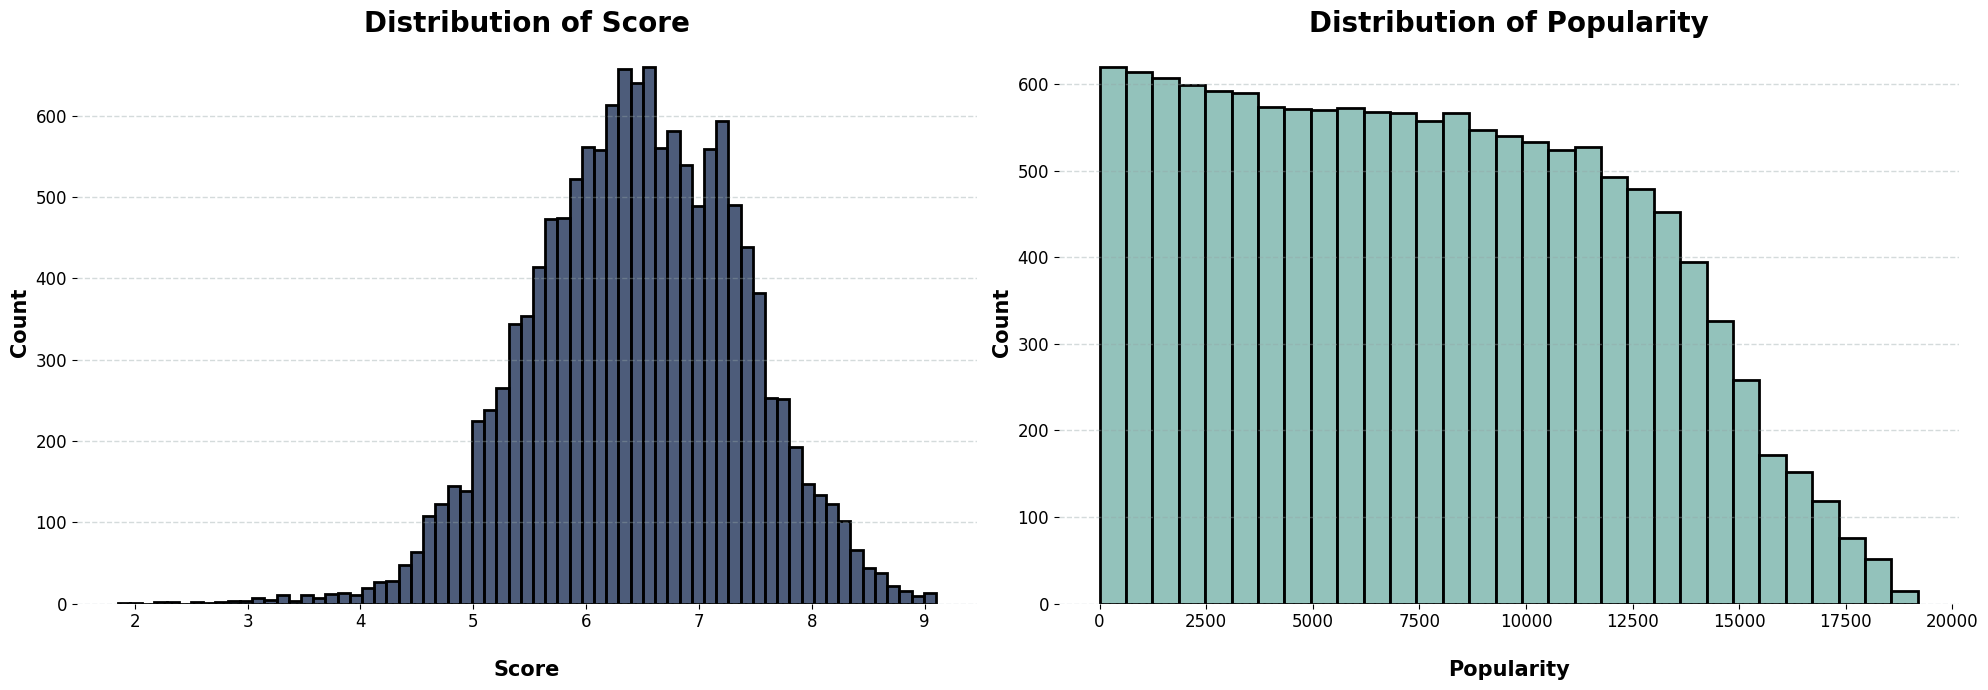

In [10]:
col = ['Score', 'Popularity']
color = ["#11264e","#6faea4"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

for i in range(2):
    p = sns.histplot(data=anime_df[col[i]], ax=ax[i], color=color[i], linewidth=2)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=20, color='k', weight='bold')
    p.axes.set_xlabel(f"\n{col[i]}",fontsize=15, weight='bold')
    p.axes.set_ylabel('Count',fontsize=15, weight='bold')
    p.axes.tick_params(labelsize=12)
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

**Nhận xét:**  

1. **Phân phối Score:**  
- Biểu đồ cho thấy **phân phối đối xứng** với dạng gần giống **phân phối chuẩn**, tập trung ở khoảng **6.0-7.0**.  
- Đuôi trái (2-5) và đuôi phải (8-9) có tần suất xuất hiện thấp.  
- Điểm số phân tán hẹp, phản ánh sự ổn định quanh trung bình **6.45**.  

2. **Phân phối Popularity:**  
- Biểu đồ này hơi lệch phải một chút nhưng cũng khá đều (không có đuôi dài), phần lớn anime có độ phổ biến thấp (<10,000).  
- Một số ít anime rất phổ biến (>15,000), nhưng tần suất giảm mạnh ở các giá trị cao.  

**Kết luận:**  
Điểm số ổn định quanh mức trung bình khá, trong khi mức độ phổ biến cho thấy sự chênh lệch lớn, với chỉ một số ít anime có sức hút vượt trội.  

**`Episodes`** và **`Time per ep (Min)`**

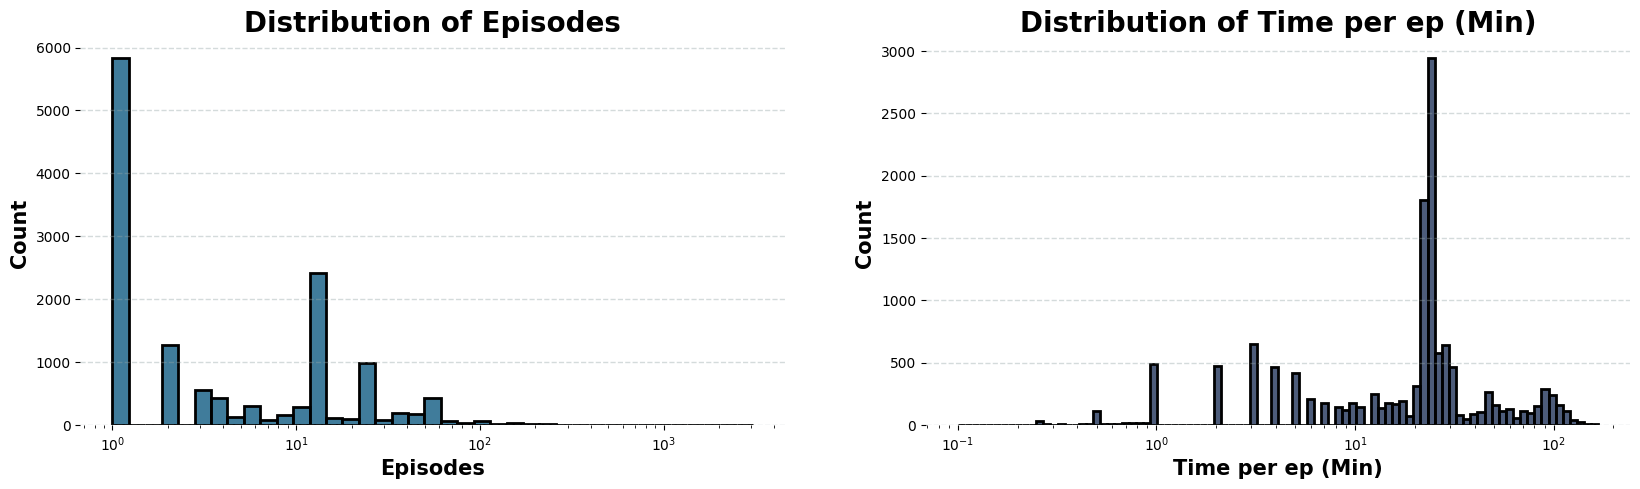

In [11]:
col = ['Episodes','Time per ep (Min)']
color = ["#00507A","#11264e"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for i in range(2):
    p = sns.histplot(data=anime_df[col[i]], ax=ax[i], color=color[i], linewidth=2, log_scale=True)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=20, color='k', weight='bold')
    p.axes.set_xlabel(f"{col[i]}",fontsize=15, weight='bold')
    p.axes.set_ylabel('Count',fontsize=15, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

**Nhận xét:**  

1. **Phân phối Episodes:**
- Đồ thị này có xu hướng **phân phối lệch phải** tương đối rõ nét  
- Đa số anime có **số tập** tương đối ít (dưới 10 tập).  
- Một số anime có **số tập trung bình** (10-100), và rất ít có số tập cực lớn (>1000).  
- Phân phối không đều, tập trung chủ yếu ở các giá trị thấp.  

2. **Phân phối thời gian mỗi tập:**  
- Thời lượng phổ biến nhất là **10-20 phút**.  
- Một số ít có thời lượng rất ngắn (<1 phút) hoặc rất dài (>100 phút).  
- Phân phối nghiêng về thời lượng trung bình với một số đỉnh nhỏ hơn.  

**Kết luận:** Cả hai phân phối đều lệch về các giá trị thấp, cho thấy xu hướng phổ biến của anime có số tập ít và thời lượng tập ngắn.  

**`Scored by`**, **`Members`**, **`Favorites`** và **`Rank`**

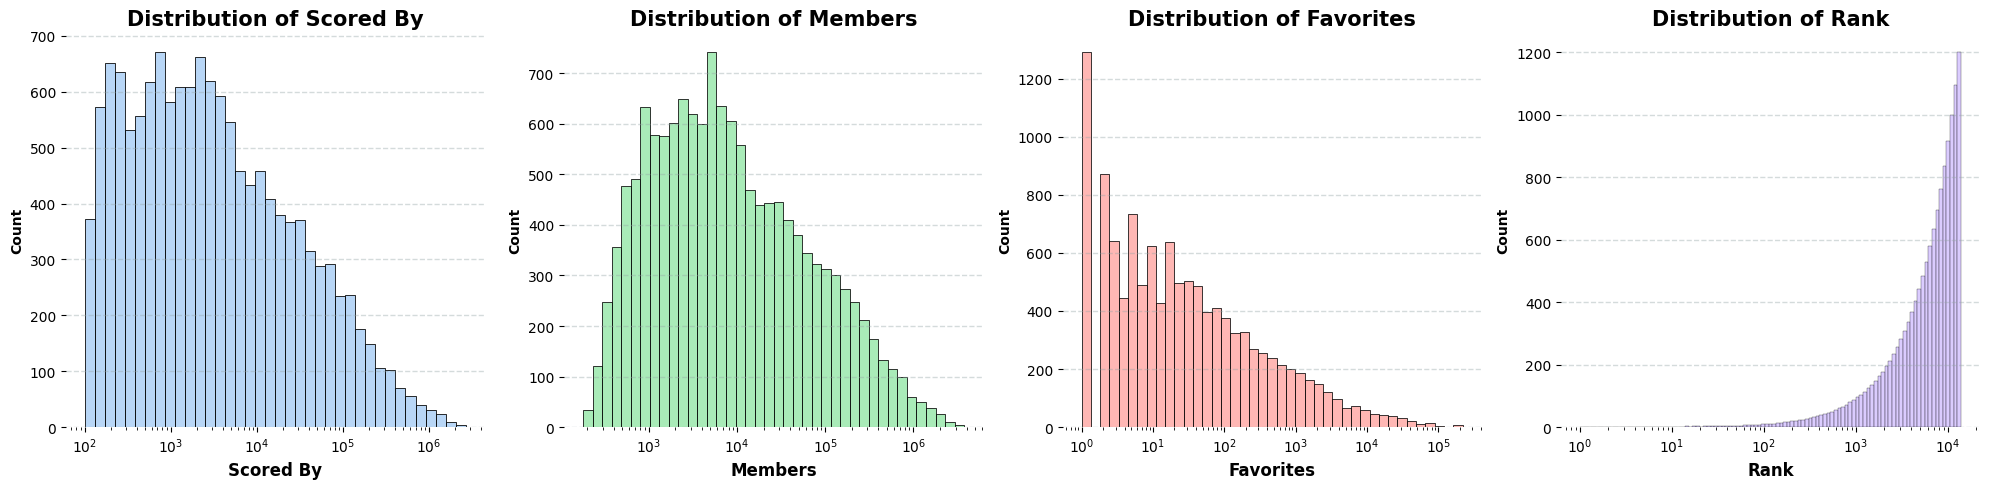

In [12]:
col = ['Scored By', 'Members', 'Favorites', 'Rank']
color = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

for i in range(4):
    # Lọc dữ liệu để loại bỏ giá trị không hợp lệ
    valid_data = anime_df[col[i]].replace([np.inf, -np.inf], np.nan).dropna()
    valid_data = valid_data[valid_data > 0]  # Giữ lại giá trị lớn hơn 0
    
    # Vẽ biểu đồ
    p = sns.histplot(data=valid_data, ax=ax[i], color=color[i], log_scale=True)
    p.axes.set_title(f"Distribution of {col[i]}", fontsize=15, color='k', weight='bold')
    p.axes.set_xlabel(f"{col[i]}", fontsize=12, weight='bold')
    p.axes.set_ylabel('Count', fontsize=10, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

**Nhận xét:**  

1. **Scored By:**  
- Phân phối biểu đồ lệch phải
- Đa số anime có khá ít người đánh giá (100-1,000)
- Biểu đồ có xu hướng giảm dần khi số người đánh giá tăng.  
- Một số ít anime có trên 1 triệu lượt đánh giá.  

2. **Members:**  
- Phân phối lệch phải, đỉnh của biểu đồ tại 10,000-30,000 thành viên. Đây là phạm vi phổ biến nhất
- Anime có dưới 1,000 hoặc trên 100,000 thành viên rất ít.
- Từ đây cho thấy phần lớn anime có độ phổ biến trung bình.

3. **Favorites:**  
- Phần lớn anime từ 10 đến 100 người xem mà họ thêm bộ anime này vào danh sách yêu thích của họ.  
- Vẫn có những bộ anime nổi bật với hơn 10,000 người yêu thích, nhưng rất ít.

4. **Rank:** Hình dạng phân phối của Ranked rất đều, lệch trái và gần như hoàn toàn khớp với nửa dưới của phân phối chuẩn.

<a class="anchor" id="3.2"></a>

### 3.2. NHÓM THUỘC TÍNH DATETIME:

Các cột dữ liệu Datetime bao gồm:

| **CỘT**               |**KIỂU DỮ LIỆU**               |
|:----------------------|:-------------------------------------------------------------|
|**`Released date`**            | datetime64[ns]                      |
|**`Completed date`**         | object                        |

Đây là hai thuộc tính dữ liệu đặc biệt, có mối liên hệ với nhau. Nhưng hai thuộc tính này trong bộ dữ liệu có kiểu dữ liệu lần lượt là `datetime64[ns]` và `object`, cho nên nhóm quyết định xử lý, tìm hiểu và đưa ra nhận xét riêng về mối quan hệ giữa hai thuộc tính dữ liệu này.

In [13]:
updating_count = (anime_df['Completed date'] == 'Updating').sum()
print(f"Số lượng bộ có Released date ở tình trạng 'Updating': {updating_count}")

Số lượng bộ có Released date ở tình trạng 'Updating': 107


Để có thể trực quan hóa biểu đồ cho các thuộc tính này, nhóm sẽ đổi các dữ liệu có giá trị là **Updating** trong cột `Completed date` thành một ngày cụ thể là ngày kết thúc đồ án (**16/12/2024**)

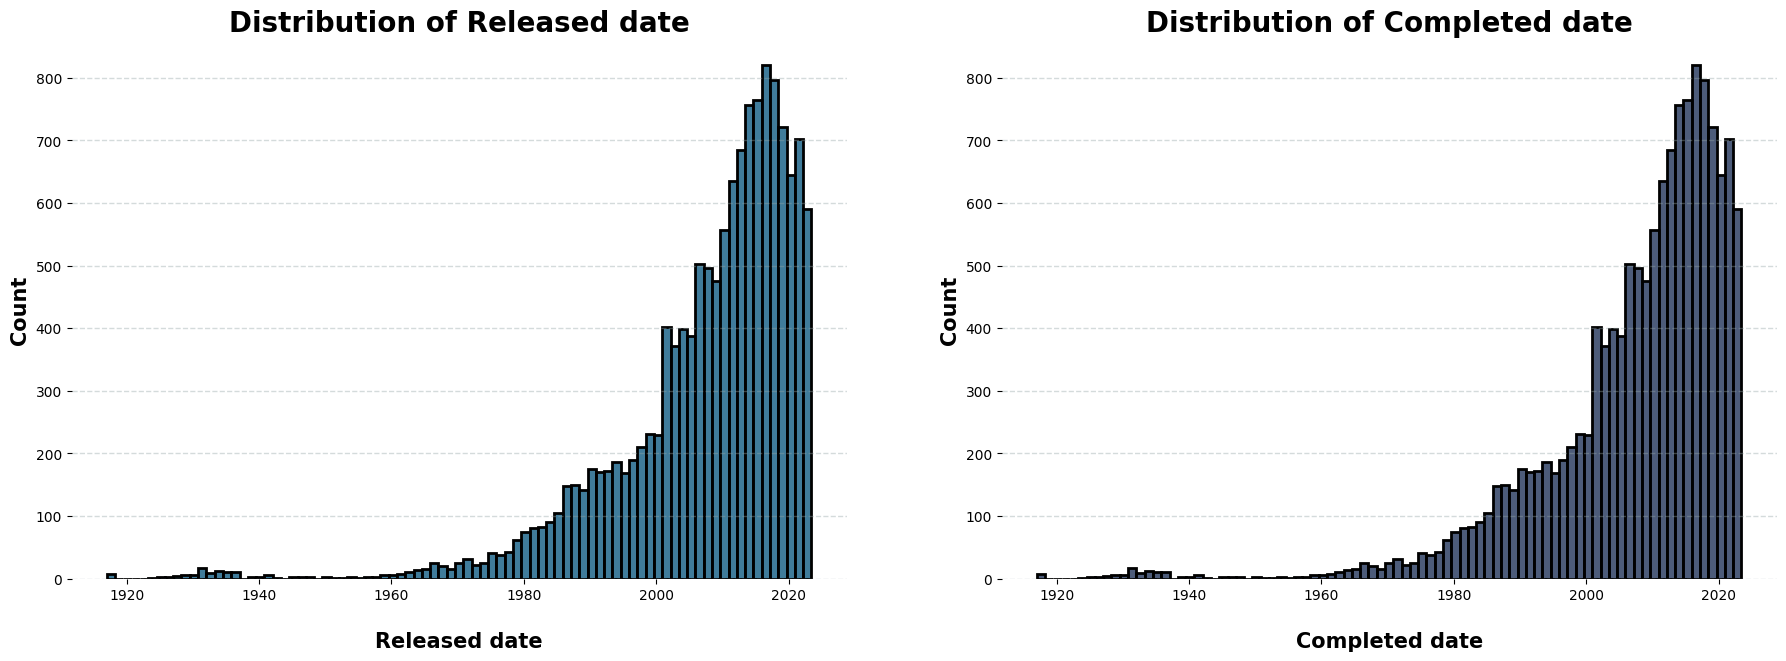

In [14]:
# Chuyển đổi giá trị "Updating" thành ngày cụ thể - Ngày 16/11/2024 (Ngày hoàn thành đồ án)
# Mục đích nhằm trực quan hóa không bị báo lỗi 
# Failed to convert value(s) to axis units: ['Updating']
date_anime_df = anime_df.copy()

date_anime_df['Completed date'] = date_anime_df['Completed date'].replace("Updating", "2024-12-16")

# Đảm bảo cột có định dạng ngày
date_anime_df['Completed date'] = pd.to_datetime(date_anime_df['Released date'], errors='coerce')

col = ['Released date', 'Completed date']
color = ["#00507A","#11264e"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 7))

for i in range(2):
    p = sns.histplot(data=date_anime_df[col[i]], ax=ax[i], color=color[i], linewidth=2)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=20, color='k', weight='bold')
    p.axes.set_xlabel(f"\n{col[i]}",fontsize=15, weight='bold')
    p.axes.set_ylabel('Count',fontsize=15, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

**Nhận xét**

1. **Phân phối Released date**
  - Từ 1920 đến khoảng 1960, số lượng anime phát hành rất ít, thể hiện sự sơ khai của ngành công nghiệp này. Từ 1980 trở đi, số lượng anime tăng đáng kể, đặc biệt từ những năm 2000 với mức tăng trưởng mạnh.
  - Đỉnh cao nhất nằm trong khoảng 2010-2020, cho thấy đây là thời kỳ hoàng kim của ngành công nghiệp anime, với nhiều tựa phim được phát hành mỗi năm.
  - Năm 2023, có khoảng 600 bộ anime được công chiếu, điều này cho thấy ngành công nghiệp này vẫn phát triển tốt.

2. **Phân phối Completed date**
  - Phân phối này tương tự như biểu đồ ngày phát hành, với xu hướng tăng trưởng rõ ràng từ 1980 và đạt đỉnh vào khoảng 2010-2020.
  - Số lượng anime hoàn thành trước năm 1980 rất ít, phản ánh sự phát triển chậm của ngành trong giai đoạn này.
  - Năm 2023, cũng có khoảng 600 bộ anime kết thúc trong năm đó.

Cả hai biểu đồ trên đều có phân phối bên trái, nhưng điều này có thể giải thích bằng sự phát triển theo lịch sử của ngành công nghiệp anime. Trước năm 1980, anime không được phổ biến và nổi tiếng lắm nên số lượng anime được phát hành và hoàn thành trong những năm đó là ít nhất. Từ năm 2010 đến năm 2020, ngành công nghiệp anime tăng trưởng mạnh mẽ nên số lượng anime được phát hành và hoàn thành trong những năm đó cũng nhiều nhất.

<a class="anchor" id="3.3"></a>

### 3.3. NHÓM THUỘC TÍNH CATEGORY:

Các cột có kiểu dữ liệu non-numeric bao gồm

| **CỘT**               |**KIỂU DỮ LIỆU**               |
|:----------------------|:-------------------------------------------------------------|
|**`Name`**            | object                      |
|**`Genres`**         | object                        |
|**`Synopsis`**| object                   |
|**`Type`**             | object                            |
|**`Producers`**       | object                                  |
|**`Studios`**        | object               |
|**`Source`**        | object              |
|**`Rating`**          | object     |

Với mỗi cột có kiểu dữ liệu non-numeric, chúng ta sẽ phân tích các thành phần sau:
- Tỷ lệ phần trăm các giá trị bị thiếu là bao nhiêu?
- Có bao nhiêu giá trị khác nhau?
- Chúng có bất thường không?
- Phân phối của mỗi cột 

<a class="anchor" id="3.3.1"></a>

#### 3.3.1 Xem xét các thuộc tính có kiểu dữ liệu là string: `Name`, `Type`, `Source`, `Rating`

In [15]:
str_col_dist_df = pd.DataFrame({'Name': [.0] * 3,
                                'Type': [.0] * 3,
                                'Source': [.0] * 3,
                                'Rating': [.0] * 3,
                                },
                                index=['Missing_ratio', 'Num_diff_vals', 'Distribution'], dtype=object)

str_col_dist_df.loc['Num_diff_vals'] = anime_df[str_col_dist_df.columns].nunique()
str_col_dist_df.loc['Distribution'] = anime_df[str_col_dist_df.columns].apply(lambda col: col.value_counts().to_dict())
str_col_dist_df.loc['Missing_ratio'] = (anime_df[['Name', 'Type', 'Source', 'Rating']] == '').sum() / anime_df.shape[0] * 100
str_col_dist_df

,Name,Type,Source,Rating
Missing_ratio,0.0,0.0,0.0,0.0
Num_diff_vals,13834,6,17,6
Distribution,"{'Fullmetal Alchemist: Brotherhood': 1, 'Mofa ...","{'TV': 4305, 'OVA': 3203, 'Movie': 2267, 'Spec...","{'Manga': 4051, 'Original': 3593, 'Unknown': 1...","{'PG-13 - Teens 13 or older': 6431, 'G - All A..."


*Đánh giá chung:*

- Về Missing_ratio: Tất cả các thuộc tính đều không có giá trị thiếu
- Về Num_diff_vals và Diff_vals:
    - Không có bộ anime nào có tiêu đề trùng nhau, mặc dù có nhiều bộ anime có nhiều mùa khác nhau
    - Cột `Type` bao gồm 6 thể loại: `TV`, `OVA`, `Movie`, `Special`, `ONA`, `Music`
    - Có $1298$ studios tham gia vào ngành công nghiệp anime tính đến năm 2023
    - Nguyên tác dùng cho sản xuất anime là rất phong phú với $17$ nguồn khác nhau
    - Cột `Rating` bao gồm 6 rating: `PG-13 - Teens 13 or older`, `G - All Ages`, `Rx - Hentai`, `R - 17+ (violence & profanity)`, `R+ - Mild Nudity`, `PG - Children`

**`Source`**

Với cột này, có một vài giá trị trong các cột có giá trị là **UNKNOWN**, cho nên để trực quan hóa được tối ưu nhất, nhóm sẽ không biểu diễn các giá trị **UNKNOWN**

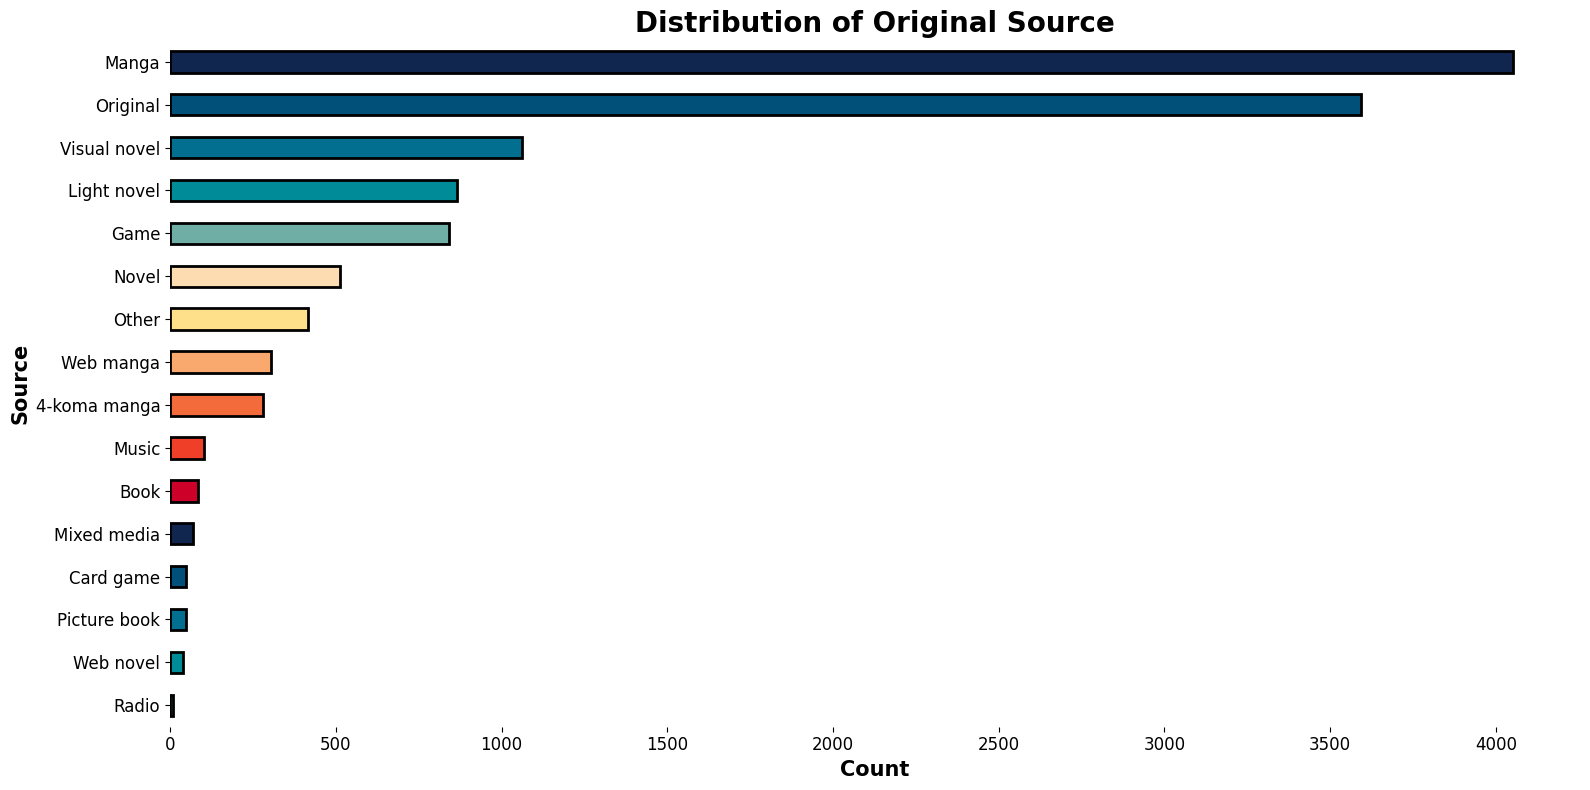

In [16]:
# Loại bỏ các giá trị 'Unknown' trong cột 'Source'
filtered_anime_sources = anime_df[anime_df['Source'] != 'Unknown']

# Lấy dữ liệu để trực quan hóa
sources = filtered_anime_sources['Source'].value_counts()

# Màu sắc cho biểu đồ
color = ["#11264e", "#00507A", "#026e90", "#008b99", "#6faea4", 
         "#fcdcb0", "#FEE08B", "#faa96e", "#f36b3b", "#ef3f28", "#CC0028"]

# Vẽ biểu đồ: Distribution of Original Source
fig, ax = plt.subplots(figsize=(16, 8))  # Chỉ cần một biểu đồ

sources.plot(
    kind='barh',
    ax=ax,
    color=color[:len(sources)],  # Giới hạn màu theo số lượng giá trị
    linewidth=2,
    edgecolor='k'
)

# Thiết lập tiêu đề và nhãn
ax.set_title('Distribution of Original Source', fontsize=20, color='k', weight='bold')
ax.set_xlabel('Count', fontsize=15, weight='bold')
ax.set_ylabel('Source', fontsize=15, weight='bold')
ax.tick_params(labelsize=12)
ax.invert_yaxis()  # Đảo ngược trục y để giá trị lớn nhất ở trên

# Loại bỏ đường viền
sns.despine(left=True, bottom=True, ax=ax)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


**`Type`** và **`Rating`**

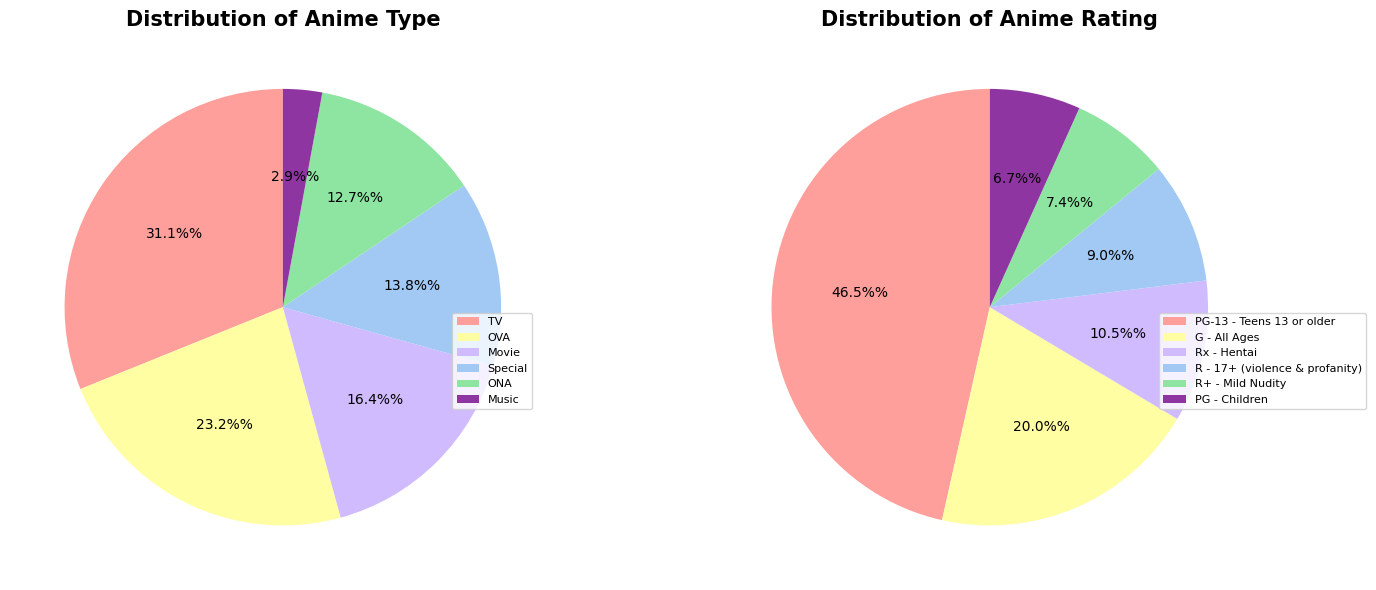

In [17]:
# Tạo figure và các trục subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 hàng, 2 cột

# Biểu đồ tròn (Pie chart)
status_counts = anime_df['Type'].value_counts()
pie_colors = ['#ff9f9b', '#fffea3', '#d0bbff', '#a1c9f4', '#8de5a1', '#8e35a1']
axes[0].pie(status_counts, autopct=lambda pct: f'{pct:.1f}%%' if pct >= 1 else '', 
            colors=pie_colors, startangle=90)
axes[0].set_title('Distribution of Anime Type', fontsize=15, fontweight='bold')
axes[0].legend(status_counts.index, fontsize=8, loc='upper left', bbox_to_anchor=(0.8, 0.5))


# Biểu đồ tròn (Pie chart)
status_counts = anime_df['Rating'].value_counts()
pie_colors = ['#ff9f9b', '#fffea3', '#d0bbff', '#a1c9f4', '#8de5a1', '#8e35a1']
axes[1].pie(status_counts, autopct=lambda pct: f'{pct:.1f}%%' if pct >= 1 else '', 
            colors=pie_colors, startangle=90)
axes[1].set_title('Distribution of Anime Rating', fontsize=15, fontweight='bold')
axes[1].legend(status_counts.index, fontsize=8, loc='upper left', bbox_to_anchor=(0.8, 0.5))

# Điều chỉnh layout
plt.tight_layout()
plt.show()


<a class="anchor" id="3.3.2"></a>

#### 3.3.2. Xem xét các thuộc tính có nhiều giá trị là: `Genres`, `Producers` và `Studios`

In [18]:
# Chuyển đổi dữ liệu từ chuỗi thành list cho các cột 'Genres' và 'Producers'
anime_df['Genres'] = anime_df['Genres'].str.split(', ')
anime_df['Producers'] = anime_df['Producers'].str.split(', ')
anime_df['Studios'] = anime_df['Studios'].str.split(', ')

In [19]:
anime_df.head()

,Name,Score,Genres,Synopsis,Type,Episodes,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
0,Fullmetal Alchemist: Brotherhood,9.10,"[Action, Adventure, Drama, Fantasy]",After a horrific alchemy experiment goes wrong...,TV,64.0,"[Aniplex, Square Enix, Mainichi Broadcasting S...",[Bones],Manga,24.0,R - 17+ (violence & profanity),1,3,217606,2020030,3176556,2009-04-05,2010-07-04
1,Steins;Gate,9.07,"[Drama, Sci-Fi, Suspense]",Eccentric scientist Rintarou Okabe has a never...,TV,24.0,"[Frontier Works, Media Factory, Kadokawa Shote...",[White Fox],Visual novel,24.0,PG-13 - Teens 13 or older,2,13,182964,1336233,2440369,2011-04-06,2011-09-14
2,Bleach: Sennen Kessen-hen,9.07,"[Action, Adventure, Fantasy]",Substitute Soul Reaper Ichigo Kurosaki spends ...,TV,13.0,"[TV Tokyo, Aniplex, Dentsu, Shueisha]",[Pierrot],Manga,24.0,R - 17+ (violence & profanity),3,464,17999,213872,445198,2022-10-11,2022-12-27
3,Gintama°,9.06,"[Action, Comedy, Sci-Fi]","Gintoki, Shinpachi, and Kagura return as the f...",TV,51.0,"[TV Tokyo, Aniplex, Dentsu]",[Bandai Namco Pictures],Manga,24.0,PG-13 - Teens 13 or older,4,331,15947,237957,595767,2015-04-08,2016-03-30
4,Shingeki no Kyojin Season 3 Part 2,9.05,"[Action, Drama]",Seeking to restore humanity's diminishing hope...,TV,10.0,"[Production I.G, Dentsu, Mainichi Broadcasting...",[Wit Studio],Manga,23.0,R - 17+ (violence & profanity),5,24,55245,1471825,2104016,2019-04-29,2019-07-01


In [20]:
list_col_dist_df = pd.DataFrame({'Genres': [.0] * 3,
                                 'Producers': [.0] * 3,
                                 'Studios': [.0] * 3},
                                index=['Missing_ratio', 'Num_diff_vals', 'Distribution'], dtype=object)

# Concatenate and find unique values
list_col_dist_df.loc['Distribution'] = anime_df[['Genres', 'Producers', 'Studios']].apply(lambda col: pd.Series(col.sum()).value_counts().to_dict())

# Calculate the number of different values
list_col_dist_df.loc['Num_diff_vals'] = list_col_dist_df.loc['Distribution'].apply(len)

list_col_dist_df.loc['Missing_ratio'] = anime_df[['Genres', 'Producers', 'Studios']].apply(lambda col: (col.apply(lambda x: len(x) == 0)).mean() * 100)

list_col_dist_df

,Genres,Producers,Studios
Missing_ratio,0.0,0.0,0.0
Num_diff_vals,21,1386,871
Distribution,"{'Comedy': 5039, 'Action': 3925, 'Fantasy': 32...","{'UNKNOWN': 5018, 'Aniplex': 536, 'TV Tokyo': ...","{'UNKNOWN': 2345, 'Toei Animation': 687, 'Sunr..."


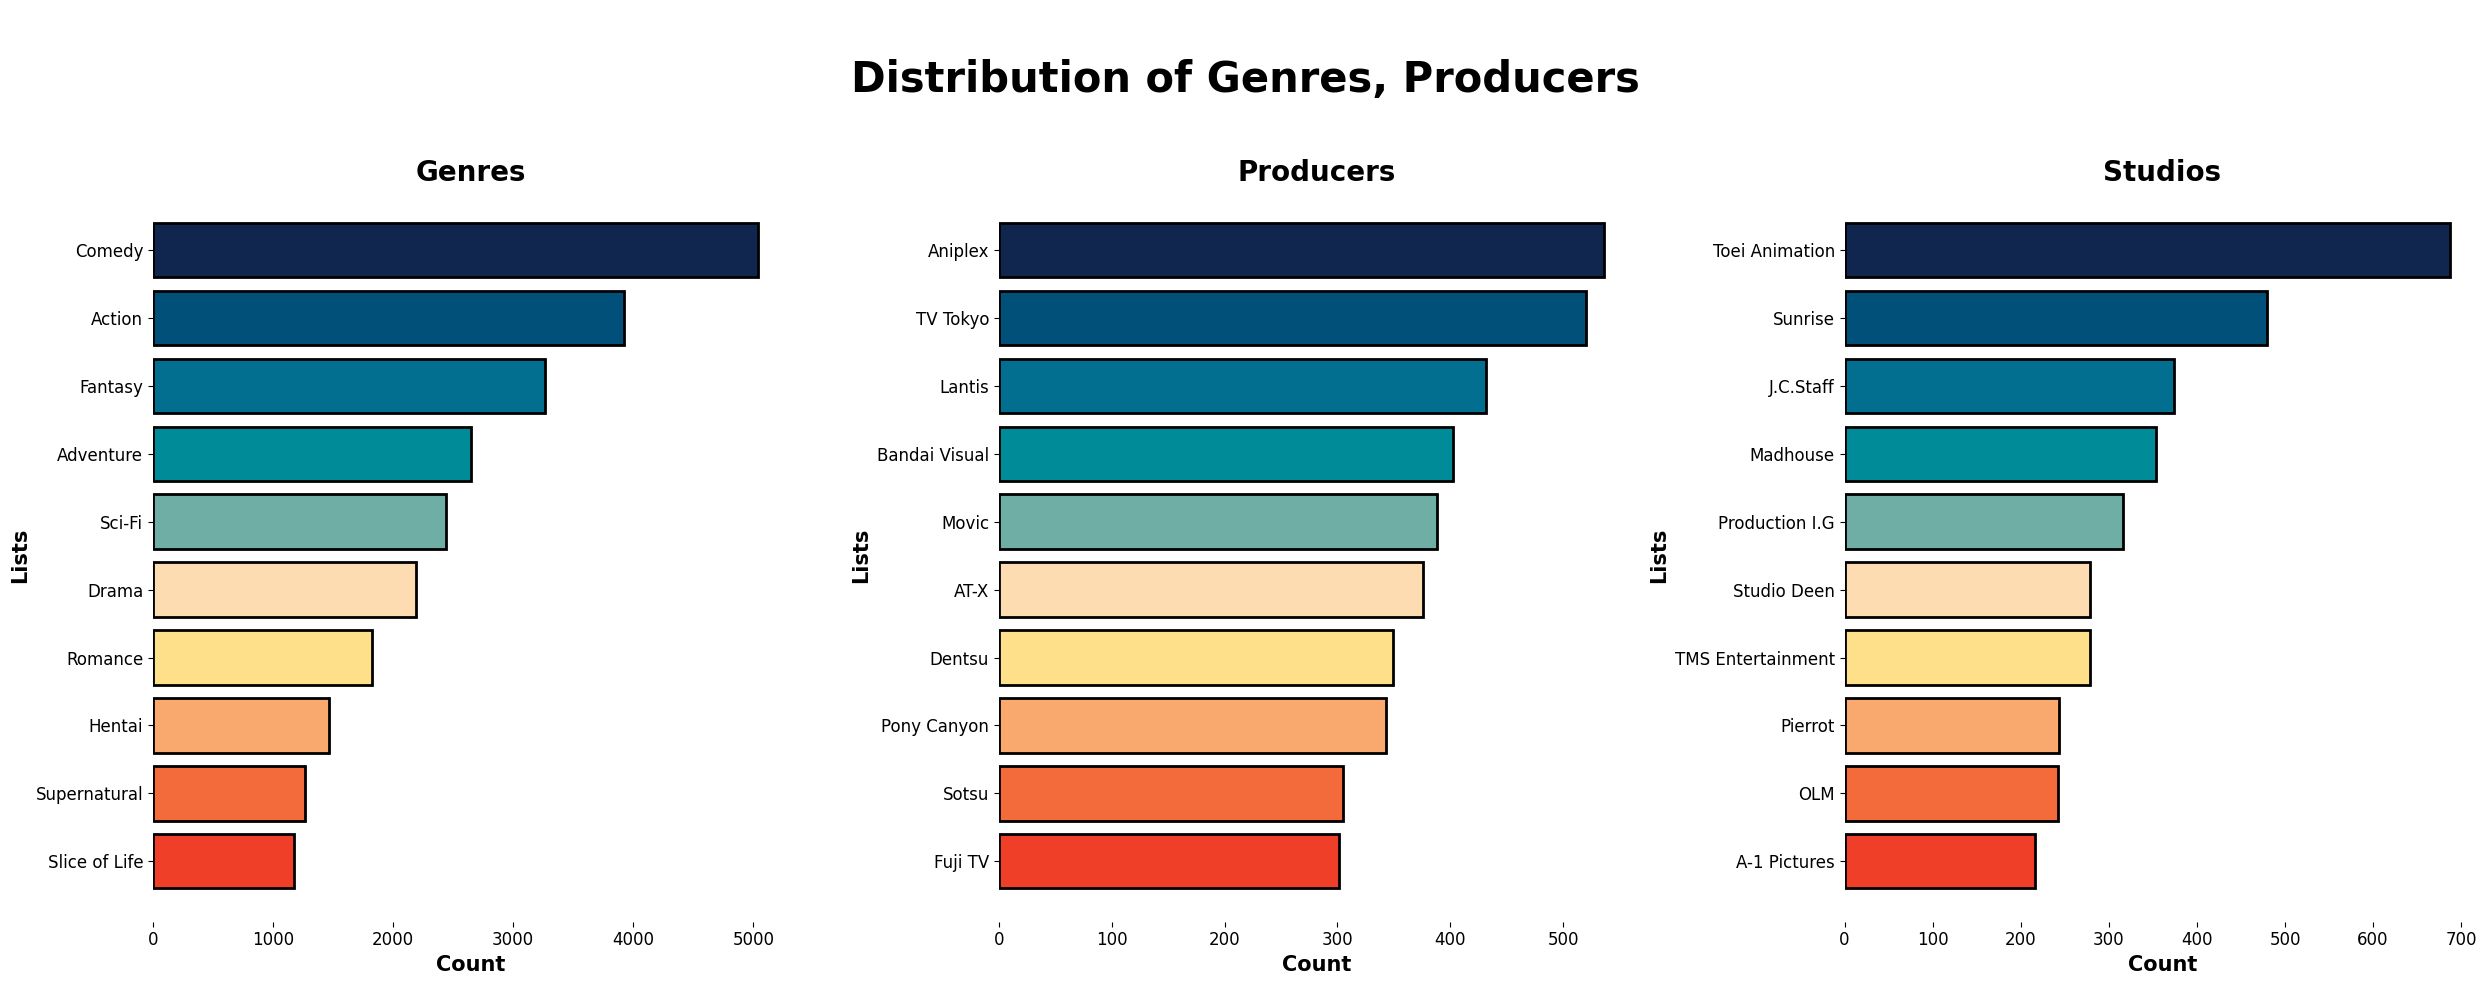

In [21]:
# Trực quan hóa phân phối của genres, producers và studios
genres = anime_df['Genres'].explode()
genres_counts = genres.value_counts().head(10)

studios = anime_df['Studios'].explode()
# Loại giá trị UNKNOWN để đưa ra kết quả trực quan tốt cho 'Studios'
studios = studios[studios != 'UNKNOWN']
studios_counts = studios.value_counts().head(10)

producers = anime_df['Producers'].explode()
# Loại giá trị UNKNOWN để đưa ra kết quả trực quan tốt cho 'Producers'
producers = producers[producers != 'UNKNOWN']
producers_counts = producers.value_counts().head(10)

fig, ax = plt.subplots(1, 3, figsize=(25, 10))
fig.suptitle('\nDistribution of Genres, Producers\n', fontsize=30, fontweight='bold')
for i, (col, counts) in enumerate(zip(['Genres', 'Producers', 'Studios'], [genres_counts, producers_counts, studios_counts])):
    ax[i].barh(counts.index, counts, color=color, linewidth=2, edgecolor='k')
    ax[i].set_title(col, fontsize=20, fontweight='bold')
    ax[i].set_xlabel('Count', fontsize=15, weight='bold')
    ax[i].set_ylabel('Lists', fontsize=15, weight='bold')
    ax[i].tick_params(labelsize=12)
    ax[i].invert_yaxis()

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

<a class="anchor" id="4"></a>

## 4. TRỰC QUAN HÓA TRẢ LỜI CÂU HỎI

Nhóm sẽ thực hiện trực quan hóa một vài câu hỏi để khám phá và tìm hiểu sâu hơn các thuộc tính:

<a class="anchor" id="4.1"></a>

### 4.1. **Câu hỏi 1:**

**Câu hỏi**
- **Số lượng anime được phát hành thay đổi như thế nào theo các mùa khác nhau trong năm? Có xu hướng rõ ràng nào trong việc phân phối các bản phát hành anime theo mùa không?**

**Mục đích**
- Tìm hiểu sâu hơn về chu kỳ phát hành anime, khám phá xu hướng phát hành anime.
- Cung cấp thông tin có giá trị cho các nhà xuất bản, độc giả và các chuyên gia trong ngành để lập kế hoạch, chiến lược tiếp thị và ra quyết định sáng suốt.

**Phân tích**
- Tạo một cột mới `Season` để lưu trữ mùa trong năm mà anime được phát hành.
- Nhóm dữ liệu theo `Season` và tính tổng số bản phát hành anime trong mỗi mùa.
- Biểu diễn dữ liệu bằng biểu đồ cột và biểu đồ miền để quan sát các xu hướng phát hành anime qua các mùa.

In [22]:
df_copy = anime_df.copy()
df_copy['Month'] = df_copy['Released date'].dt.month.astype('int64')
df_copy['Year'] = df_copy['Released date'].dt.year.astype('int64')
df_copy['Decade'] = df_copy['Year'] // 10 * 10
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
df_copy['Season'] = pd.cut(df_copy['Month'], [0, 3, 6, 9, 12], labels=seasons, include_lowest=True)

anime_per_season = df_copy[df_copy['Year'] >= 1990].groupby(['Decade', 'Season']).size().reset_index(name='Count')
anime_per_season['Percentage'] = anime_per_season['Count'] / anime_per_season.groupby('Decade')['Count'].transform('sum') * 100

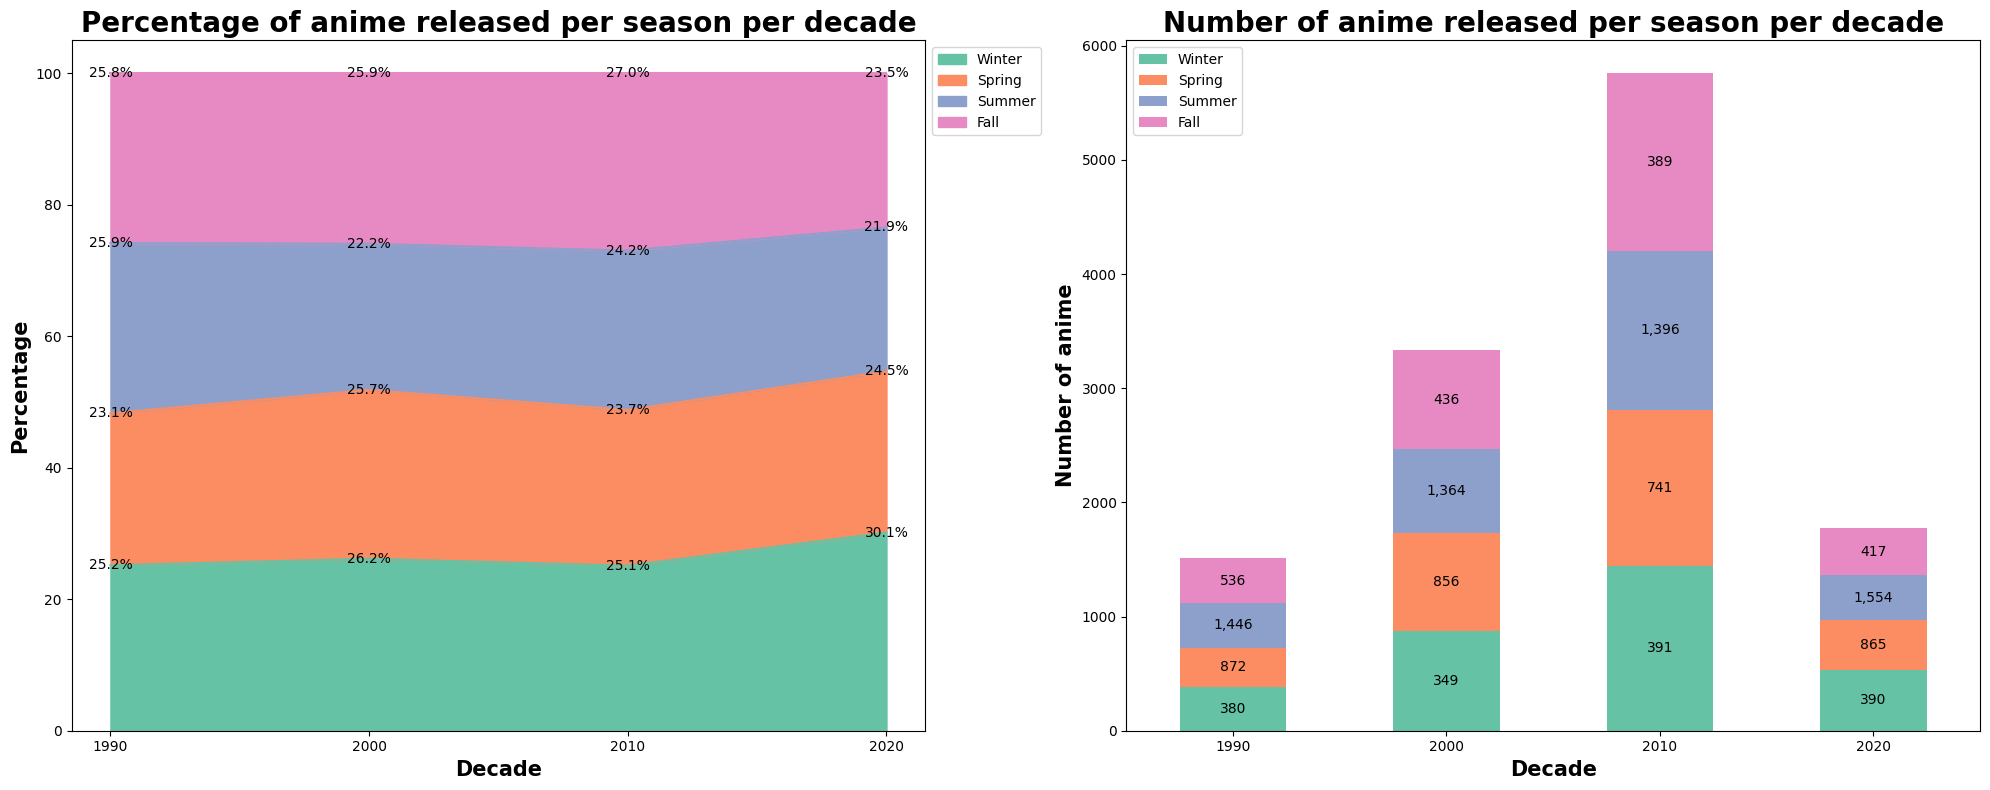

In [23]:
sns.set_palette("Set2")

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

anime_per_season.groupby(['Decade', 'Season'])['Percentage'].sum().unstack().plot(kind='area', stacked=True, ax=ax[0])
ax[0].set_title('Percentage of anime released per season per decade', fontsize=20, weight='bold')
ax[0].set_xlabel('Decade', fontsize=15, weight='bold')
ax[0].set_ylabel('Percentage', fontsize=15, weight='bold')
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1, 0, 0))
ax[0].set_xticks(range(1990, 2030, 10))

anime_per_season.groupby(['Decade', 'Season'])['Count'].sum().unstack().plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Number of anime released per season per decade', fontsize=20, weight='bold')
ax[1].set_xlabel('Decade', fontsize=15, weight='bold')
ax[1].set_ylabel('Number of anime', fontsize=15, weight='bold')
ax[1].legend(loc='upper left')
ax[1].set_xticklabels(anime_per_season['Decade'].unique(), rotation=0)

for decade, row in anime_per_season.groupby('Decade'):
    if decade in ax[0].get_xticks():
        temp = 0
        for season, percentage in row.set_index('Season')['Percentage'].items():
            x_pos = decade
            temp += percentage
            y_pos = temp
            ax[0].text(x_pos, y_pos, f"{percentage:.1f}%", ha='center', va='center', fontsize=10)

bars = ax[1].patches
for bar, (index, decade, season, count) in zip(bars, anime_per_season[['Decade', 'Season', 'Count']].itertuples()):
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = bar.get_y() + bar.get_height() / 2
    ax[1].text(x_pos, y_pos, f"{count:,}", ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()


**Nhận xét**

Tỷ lệ phát hành anime theo mùa cho thấy một mô hình tương đối ổn định qua nhiều năm, với sự phân chia khá đồng đều giữa bốn mùa. Tuy nhiên, khi phân tích chi tiết hơn trong ba thập kỷ (1990–2020), có thể nhận thấy một số xu hướng thay đổi rõ rệt, đặc biệt trong cách các mùa được ưu tiên phát hành anime.

1. **Xu hướng số lượng phát hành:**  
- **Tăng trưởng tổng thể:** Số lượng anime phát hành tăng mạnh từ thập kỷ 1990 (khoảng 1,500 anime) lên mức cao nhất vào thập kỷ 2010 (hơn 5,700 anime).  
- **Giảm nhẹ vào thập kỷ 2020:** Số lượng phát hành giảm so với thập kỷ trước, xuống còn khoảng 3,200 anime. Điều này có thể do ảnh hưởng của các yếu tố toàn cầu như đại dịch COVID-19 hoặc sự chuyển dịch trọng tâm trong ngành công nghiệp anime.  

2. **Động lực từ thập kỷ 2010 trở đi:**  
- Sự gia tăng tỷ lệ phát hành vào mùa đông và mùa thu, cùng với sự giảm sút ở mùa hè, phản ánh sự thay đổi trong cách ngành công nghiệp anime đáp ứng thị hiếu người xem.  
- Chiến lược phát hành dường như tập trung vào mùa đông và mùa thu, khi người xem có nhiều thời gian hơn để tiêu thụ nội dung, đặc biệt là trong các kỳ nghỉ lễ.

<a class="anchor" id="4.2"></a>

### 4.2. **Câu hỏi 2:**

**Câu hỏi**
- Độ dài của tên anime đã thay đổi như thế nào qua các năm?
- Thể loại anime nào sẽ có tên dài?

**Mục đích**
- Khám phá xu hướng đặt tên và tên bộ anime thay đổi qua các năm
- Hiểu thêm về văn hóa xem anime của độc giả
- Xác định thể loại anime nào thường có tên dài một cách vô lý

**Phân tích**
- Tạo cột `Name_Length` để tính độ dài của `Title` và cột `Year` để lưu năm phát hành của anime
- Lấy 2 cột `Year` và `Name_Length` từ dữ liệu gốc và lưu vào dữ liệu mới.
- Tính giá trị trung bình và giá trị lớn nhất của độ dài tên anime của mỗi năm và trực quan hóa chúng

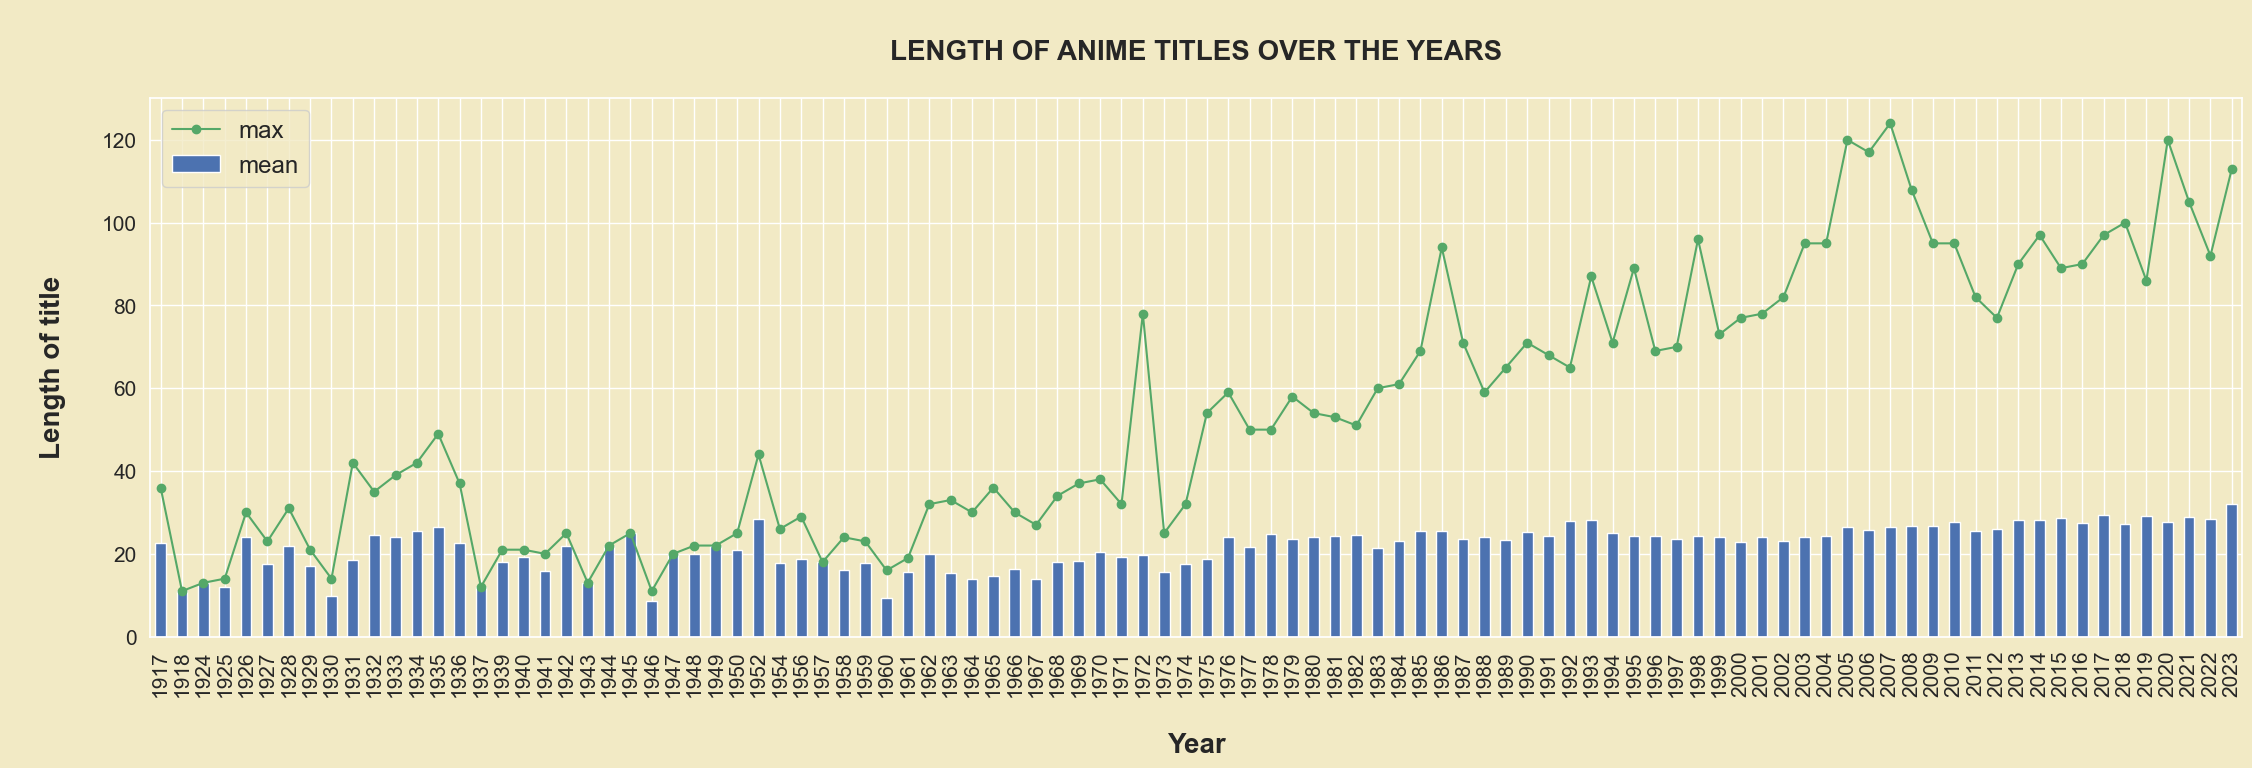

In [24]:
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
anime_copy_df = anime_df.copy()
new_col = anime_copy_df['Name'].str.len()
new_col.name = 'Name_Length'
anime_copy_df = pd.concat((anime_copy_df, new_col), axis=1)
anime_copy_df['Year'] = pd.to_datetime(anime_copy_df['Released date'], errors='coerce').dt.year

t = anime_copy_df[['Name_Length', 'Year']]
t2 = t.groupby('Year')['Name_Length'].agg(['mean', 'max']).reset_index()

ax = t2.plot(y='max', linestyle='-', marker='o', color='g')
t2.plot(x='Year', y='mean', kind='bar', ax=ax, figsize=(27,7), fontsize=15)
ax.legend(loc='upper left', fontsize='x-large')
ax.set_xlabel('\nYear', fontsize=20, weight='bold')
ax.set_ylabel('\nLength of title\n', fontsize=20, weight='bold')
ax.set_title('\nLENGTH OF ANIME TITLES OVER THE YEARS\n',fontsize=20, weight='bold')
plt.show()

**Nhận xét**

1. **`Mean`**:
    - Độ dài trung bình của tên một bộ Anime có xu hướng tăng theo từng năm và điều này vẫn đang được tiếp diễn.
    - Độ dài tiêu đề của một bộ Anime trước đây là từ 10 - 20 ký tự. Hiện tại, số lượng kí tự đã tăng lên khoảng 30 -35 ký tự.

2. **`Max`**:
    - Giới hạn cao nhất đối với các tiêu đề đã tăng đáng kể theo từng năm. Bắt đầu từ năm 1970 đến nay, chúng ta thấy độ dài tiêu đề anime tăng nhanh chóng.
    - Đỉnh điểm của sự gia tăng này là hai giai đoạn **2005, 2006, 2007** và **2021**. Đây là hai giai đoạn đánh dấu xu hướng đặt tên dài cho các tiêu đề anime.
    - Tựa đề dài nhất của một bộ anime là khoảng hơn **120 ký tự** vào năm 2007
    - Sau năm 2021, độ dài tiêu đề vẫn giữ ổn định, nhưng so với những năm đỉnh điểm, thì độ dài tiêu đề đã giảm xuống.

3. **Một số lý do tại sao nhiều bộ anime có tựa đề dài**:
   - **Mô tả nội dung ngay từ tiêu đề:** Các tựa đề dài thường giúp người xem hiểu rõ hơn về nội dung hoặc chủ đề của anime ngay từ cái nhìn đầu tiên và liệu nó có hợp với sở thích của họ hay không. Điều này đặc biệt phổ biến ở những bộ anime dựa trên light novel hoặc anime, nơi tựa đề thường là một câu mô tả ngắn gọn về câu chuyện.  

   - **Thể hiện sự hài hước hoặc độc đáo:** Nhiều anime sử dụng tựa đề dài như một yếu tố hài hước hoặc để tạo sự tò mò. Các tựa đề này thường gây ấn tượng mạnh và dễ nhớ nhờ sự kỳ quặc của chúng.  

   - **Nhấn mạnh yếu tố gây chú ý trong bối cảnh cạnh tranh:** Ngành công nghiệp anime rất cạnh tranh, với hàng trăm bộ phát hành mỗi năm. Một cách để nổi bật trong danh sách dài các bộ anime là tựa đề dài và độc đáo. Tựa đề như một "quảng cáo" cho anime, giúp thu hút người xem tiềm năng.

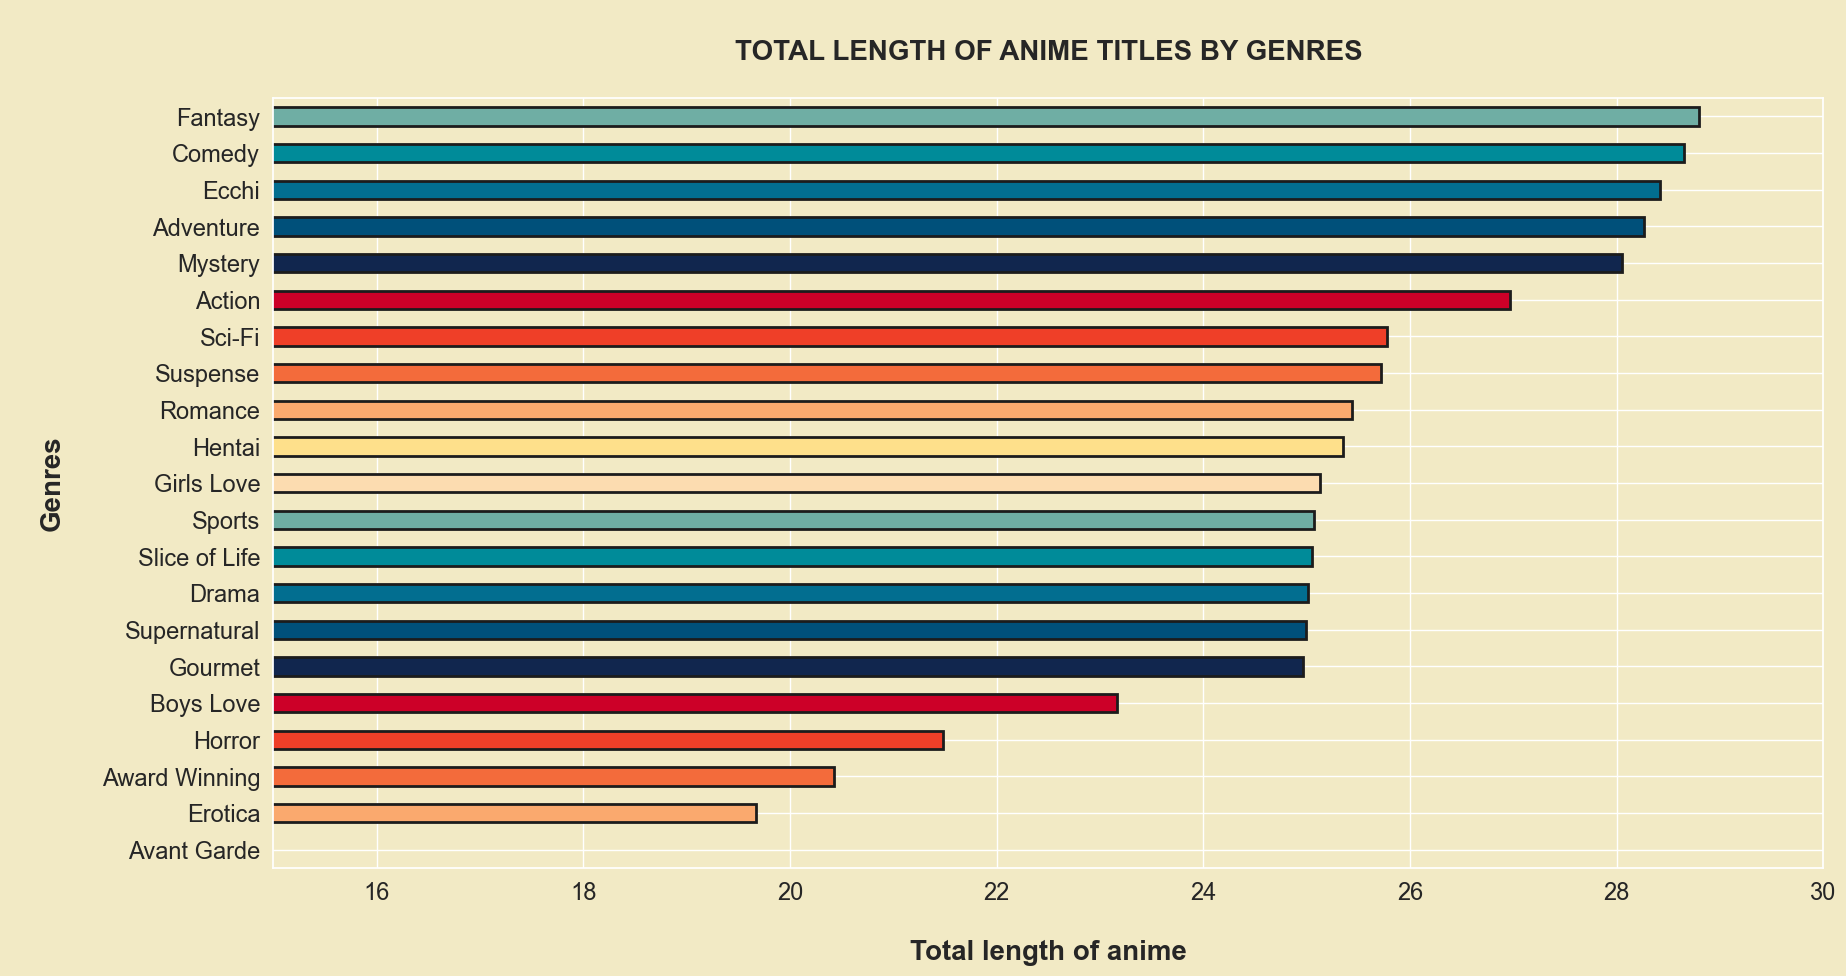

In [25]:
df = anime_copy_df.explode('Genres').reset_index()

color = ["#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028","#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0"]

df1 = df.groupby('Genres')['Name_Length'].mean().sort_values()
ax = df1.plot(kind='barh', figsize=(20,10), edgecolor ="#1c1c1c", linewidth=2, color=color,stacked=True, fontsize=17,xlim=(15,30))
ax.set_xlabel('\nTotal length of anime', fontsize=20, weight='bold')
ax.set_ylabel('\nGenres\n', fontsize=20, weight='bold')
ax.set_title('\nTOTAL LENGTH OF ANIME TITLES BY GENRES\n',fontsize=20, weight='bold')
plt.show()


**Nhận xét**

- `Fantasy` là thể loại có tên anime dài nhất.

- `Comedy` và `Ecchi` cũng là thể loại có tên dài bên cạnh Fantasy.

- `Adventure`, `Mystery`, `Action`, `Sci-Fi`, `Suspense`, `Romance` là những thể loại ưa chuộng tên ngắn hơn.

- **Tại sao Fantasy lại là thể loại thường có tên dài?** 
    - Từ năm 2005 đến nay, Fantasy là thể loại được ưa chuộng nhất và cũng trong những năm này, xu hướng tên dài đã tăng lên (đã phân tích ở trên). Từ hai điều này có thể lý giải tại sao Fantasy là thể loại thường được đặt tên dài nhất.